In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# plt.rcParams['font.family'] = 'DejaVu Sans'

In [2]:
xl_file = pd.ExcelFile("E:\\数学建模国赛\\2022数学建模赛题\\C题\\附件.xlsx")
sheet1 = xl_file.parse('表单1')  # 玻璃文物的基本信息
sheet2 = xl_file.parse('表单2')  # 已分类玻璃文物的化学成分比例
sheet1.head()

,文物编号,纹饰,类型,颜色,表面风化
0,1,C,高钾,蓝绿,无风化
1,2,A,铅钡,浅蓝,风化
2,3,A,高钾,蓝绿,无风化
3,4,A,高钾,蓝绿,无风化
4,5,A,高钾,蓝绿,无风化


In [3]:
sheet2.head()

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,01,69.33,NaN,9.99,6.32,0.87,3.93,1.74,3.87,NaN,NaN,1.17,NaN,NaN,0.39
1,02,36.28,NaN,1.05,2.34,1.18,5.73,1.86,0.26,47.43,NaN,3.57,0.19,NaN,NaN
2,03部位1,87.05,NaN,5.19,2.01,NaN,4.06,NaN,0.78,0.25,NaN,0.66,NaN,NaN,NaN
3,03部位2,61.71,NaN,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,NaN,NaN
4,04,65.88,NaN,9.67,7.12,1.56,6.44,2.06,2.18,NaN,NaN,0.79,NaN,NaN,0.36


In [4]:
component_cols = ['二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)', 
                  '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)', 
                  '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)']

sheet2 ['成分总和'] = sheet2 [component_cols].sum(axis=1)
sheet2['成分总和']

0      97.61
1      99.89
2     100.00
3      98.88
4      96.06
       ...  
64     96.92
65     96.38
66     92.24
67     92.47
68     98.76
Name: 成分总和, Length: 69, dtype: float64

In [5]:
sheet2 = sheet2[(sheet2['成分总和'] >= 85) & (sheet2['成分总和'] <= 105)]
sheet2

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),成分总和
0,01,69.33,NaN,9.99,6.32,0.87,3.93,1.74,3.87,NaN,NaN,1.17,NaN,NaN,0.39,97.61
1,02,36.28,NaN,1.05,2.34,1.18,5.73,1.86,0.26,47.43,NaN,3.57,0.19,NaN,NaN,99.89
2,03部位1,87.05,NaN,5.19,2.01,NaN,4.06,NaN,0.78,0.25,NaN,0.66,NaN,NaN,NaN,100.00
3,03部位2,61.71,NaN,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,NaN,NaN,98.88
4,04,65.88,NaN,9.67,7.12,1.56,6.44,2.06,2.18,NaN,NaN,0.79,NaN,NaN,0.36,96.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,54严重风化点,17.11,NaN,NaN,NaN,1.11,3.65,NaN,1.34,58.46,NaN,14.13,1.12,NaN,NaN,96.92
65,55,49.01,2.71,NaN,1.13,NaN,1.45,NaN,0.86,32.92,7.95,0.35,NaN,NaN,NaN,96.38
66,56,29.15,NaN,NaN,1.21,NaN,1.85,NaN,0.79,41.25,15.45,2.54,NaN,NaN,NaN,92.24
67,57,25.42,NaN,NaN,1.31,NaN,2.18,NaN,1.16,45.10,17.30,NaN,NaN,NaN,NaN,92.47


In [6]:
sheet2 = sheet2.fillna(0)
sheet2 

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),成分总和
0,01,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,97.61
1,02,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00,99.89
2,03部位1,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,100.00
3,03部位2,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,98.88
4,04,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,96.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,54严重风化点,17.11,0.00,0.00,0.00,1.11,3.65,0.00,1.34,58.46,0.00,14.13,1.12,0.0,0.00,96.92
65,55,49.01,2.71,0.00,1.13,0.00,1.45,0.00,0.86,32.92,7.95,0.35,0.00,0.0,0.00,96.38
66,56,29.15,0.00,0.00,1.21,0.00,1.85,0.00,0.79,41.25,15.45,2.54,0.00,0.0,0.00,92.24
67,57,25.42,0.00,0.00,1.31,0.00,2.18,0.00,1.16,45.10,17.30,0.00,0.00,0.0,0.00,92.47


In [7]:
# Normalize the chemical components to sum up to 100%
sheet2[component_cols] = sheet2[component_cols].div(sheet2[component_cols].sum(axis=1), axis=0) * 100

sheet2 ['成分总和'] = sheet2 [component_cols].sum(axis=1)
sheet2

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),成分总和
0,01,71.027559,0.000000,10.234607,6.474746,0.891302,4.026227,1.782604,3.964758,0.000000,0.000000,1.198648,0.000000,0.0,0.399549,100.0
1,02,36.319952,0.000000,1.051156,2.342577,1.181299,5.736310,1.862048,0.260286,47.482230,0.000000,3.573931,0.190209,0.0,0.000000,100.0
2,03部位1,87.050000,0.000000,5.190000,2.010000,0.000000,4.060000,0.000000,0.780000,0.250000,0.000000,0.660000,0.000000,0.0,0.000000,100.0
3,03部位2,62.408981,0.000000,12.510113,5.936489,1.122573,5.562298,2.184466,5.147654,1.425971,2.892395,0.707929,0.101133,0.0,0.000000,100.0
4,04,68.582136,0.000000,10.066625,7.412034,1.623985,6.704143,2.144493,2.269415,0.000000,0.000000,0.822403,0.000000,0.0,0.374766,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,54严重风化点,17.653735,0.000000,0.000000,0.000000,1.145274,3.765993,0.000000,1.382584,60.317788,0.000000,14.579034,1.155592,0.0,0.000000,100.0
65,55,50.850799,2.811787,0.000000,1.172442,0.000000,1.504462,0.000000,0.892301,34.156464,8.248599,0.363146,0.000000,0.0,0.000000,100.0
66,56,31.602342,0.000000,0.000000,1.311795,0.000000,2.005637,0.000000,0.856461,44.720295,16.749783,2.753686,0.000000,0.0,0.000000,100.0
67,57,27.489997,0.000000,0.000000,1.416676,0.000000,2.357521,0.000000,1.254461,48.772575,18.708770,0.000000,0.000000,0.0,0.000000,100.0


In [8]:
new_component_cols = ['SiO2', 'Na2O', 'K2O', 'CaO', 'MgO', 
                      'Al2O3', 'Fe2O3', 'CuO', 'PbO', 'BaO', 
                      'P2O5', 'SrO', 'SnO2', 'SO2']

# Create a mapping from old column names to new column names
rename_dict = dict(zip(component_cols, new_component_cols))
rename_dict

{'二氧化硅(SiO2)': 'SiO2',
 '氧化钠(Na2O)': 'Na2O',
 '氧化钾(K2O)': 'K2O',
 '氧化钙(CaO)': 'CaO',
 '氧化镁(MgO)': 'MgO',
 '氧化铝(Al2O3)': 'Al2O3',
 '氧化铁(Fe2O3)': 'Fe2O3',
 '氧化铜(CuO)': 'CuO',
 '氧化铅(PbO)': 'PbO',
 '氧化钡(BaO)': 'BaO',
 '五氧化二磷(P2O5)': 'P2O5',
 '氧化锶(SrO)': 'SrO',
 '氧化锡(SnO2)': 'SnO2',
 '二氧化硫(SO2)': 'SO2'}

In [9]:
# Rename the columns
sheet2.rename(columns=rename_dict, inplace=True)

# Check the updated column names
sheet2.columns

Index(['文物采样点', 'SiO2', 'Na2O', 'K2O', 'CaO', 'MgO', 'Al2O3', 'Fe2O3', 'CuO',
       'PbO', 'BaO', 'P2O5', 'SrO', 'SnO2', 'SO2', '成分总和'],
      dtype='object')

In [10]:
import re

# Define a function to extract 文物编号 from 文物采样点
def extract_number(s):
    match = re.match(r"(\d+)", s)
    return int(match.group()) if match else None

In [11]:
# Apply the function to the 文物采样点 column
sheet2

,文物采样点,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2,成分总和
0,01,71.027559,0.000000,10.234607,6.474746,0.891302,4.026227,1.782604,3.964758,0.000000,0.000000,1.198648,0.000000,0.0,0.399549,100.0
1,02,36.319952,0.000000,1.051156,2.342577,1.181299,5.736310,1.862048,0.260286,47.482230,0.000000,3.573931,0.190209,0.0,0.000000,100.0
2,03部位1,87.050000,0.000000,5.190000,2.010000,0.000000,4.060000,0.000000,0.780000,0.250000,0.000000,0.660000,0.000000,0.0,0.000000,100.0
3,03部位2,62.408981,0.000000,12.510113,5.936489,1.122573,5.562298,2.184466,5.147654,1.425971,2.892395,0.707929,0.101133,0.0,0.000000,100.0
4,04,68.582136,0.000000,10.066625,7.412034,1.623985,6.704143,2.144493,2.269415,0.000000,0.000000,0.822403,0.000000,0.0,0.374766,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,54严重风化点,17.653735,0.000000,0.000000,0.000000,1.145274,3.765993,0.000000,1.382584,60.317788,0.000000,14.579034,1.155592,0.0,0.000000,100.0
65,55,50.850799,2.811787,0.000000,1.172442,0.000000,1.504462,0.000000,0.892301,34.156464,8.248599,0.363146,0.000000,0.0,0.000000,100.0
66,56,31.602342,0.000000,0.000000,1.311795,0.000000,2.005637,0.000000,0.856461,44.720295,16.749783,2.753686,0.000000,0.0,0.000000,100.0
67,57,27.489997,0.000000,0.000000,1.416676,0.000000,2.357521,0.000000,1.254461,48.772575,18.708770,0.000000,0.000000,0.0,0.000000,100.0


In [12]:
sheet2['文物编号'] = sheet2['文物采样点'].apply(extract_number)
sheet2

,文物采样点,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2,成分总和,文物编号
0,01,71.027559,0.000000,10.234607,6.474746,0.891302,4.026227,1.782604,3.964758,0.000000,0.000000,1.198648,0.000000,0.0,0.399549,100.0,1
1,02,36.319952,0.000000,1.051156,2.342577,1.181299,5.736310,1.862048,0.260286,47.482230,0.000000,3.573931,0.190209,0.0,0.000000,100.0,2
2,03部位1,87.050000,0.000000,5.190000,2.010000,0.000000,4.060000,0.000000,0.780000,0.250000,0.000000,0.660000,0.000000,0.0,0.000000,100.0,3
3,03部位2,62.408981,0.000000,12.510113,5.936489,1.122573,5.562298,2.184466,5.147654,1.425971,2.892395,0.707929,0.101133,0.0,0.000000,100.0,3
4,04,68.582136,0.000000,10.066625,7.412034,1.623985,6.704143,2.144493,2.269415,0.000000,0.000000,0.822403,0.000000,0.0,0.374766,100.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,54严重风化点,17.653735,0.000000,0.000000,0.000000,1.145274,3.765993,0.000000,1.382584,60.317788,0.000000,14.579034,1.155592,0.0,0.000000,100.0,54
65,55,50.850799,2.811787,0.000000,1.172442,0.000000,1.504462,0.000000,0.892301,34.156464,8.248599,0.363146,0.000000,0.0,0.000000,100.0,55
66,56,31.602342,0.000000,0.000000,1.311795,0.000000,2.005637,0.000000,0.856461,44.720295,16.749783,2.753686,0.000000,0.0,0.000000,100.0,56
67,57,27.489997,0.000000,0.000000,1.416676,0.000000,2.357521,0.000000,1.254461,48.772575,18.708770,0.000000,0.000000,0.0,0.000000,100.0,57


In [13]:
sheet1

,文物编号,纹饰,类型,颜色,表面风化
0,1,C,高钾,蓝绿,无风化
1,2,A,铅钡,浅蓝,风化
2,3,A,高钾,蓝绿,无风化
3,4,A,高钾,蓝绿,无风化
4,5,A,高钾,蓝绿,无风化
5,6,A,高钾,蓝绿,无风化
6,7,B,高钾,蓝绿,风化
7,8,C,铅钡,紫,风化
8,9,B,高钾,蓝绿,风化
9,10,B,高钾,蓝绿,风化


In [14]:
data = pd.merge(sheet1, sheet2, on='文物编号')
data

,文物编号,纹饰,类型,颜色,表面风化,文物采样点,SiO2,Na2O,K2O,CaO,...,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2,成分总和
0,1,C,高钾,蓝绿,无风化,01,71.027559,0.000000,10.234607,6.474746,...,4.026227,1.782604,3.964758,0.000000,0.000000,1.198648,0.000000,0.0,0.399549,100.0
1,2,A,铅钡,浅蓝,风化,02,36.319952,0.000000,1.051156,2.342577,...,5.736310,1.862048,0.260286,47.482230,0.000000,3.573931,0.190209,0.0,0.000000,100.0
2,3,A,高钾,蓝绿,无风化,03部位1,87.050000,0.000000,5.190000,2.010000,...,4.060000,0.000000,0.780000,0.250000,0.000000,0.660000,0.000000,0.0,0.000000,100.0
3,3,A,高钾,蓝绿,无风化,03部位2,62.408981,0.000000,12.510113,5.936489,...,5.562298,2.184466,5.147654,1.425971,2.892395,0.707929,0.101133,0.0,0.000000,100.0
4,4,A,高钾,蓝绿,无风化,04,68.582136,0.000000,10.066625,7.412034,...,6.704143,2.144493,2.269415,0.000000,0.000000,0.822403,0.000000,0.0,0.374766,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,54,C,铅钡,浅蓝,风化,54严重风化点,17.653735,0.000000,0.000000,0.000000,...,3.765993,0.000000,1.382584,60.317788,0.000000,14.579034,1.155592,0.0,0.000000,100.0
63,55,C,铅钡,绿,无风化,55,50.850799,2.811787,0.000000,1.172442,...,1.504462,0.000000,0.892301,34.156464,8.248599,0.363146,0.000000,0.0,0.000000,100.0
64,56,C,铅钡,蓝绿,风化,56,31.602342,0.000000,0.000000,1.311795,...,2.005637,0.000000,0.856461,44.720295,16.749783,2.753686,0.000000,0.0,0.000000,100.0
65,57,C,铅钡,蓝绿,风化,57,27.489997,0.000000,0.000000,1.416676,...,2.357521,0.000000,1.254461,48.772575,18.708770,0.000000,0.000000,0.0,0.000000,100.0


In [15]:
data.drop(['颜色','纹饰','文物编号','成分总和'],axis=1,inplace=True)
data

,类型,表面风化,文物采样点,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2
0,高钾,无风化,01,71.027559,0.000000,10.234607,6.474746,0.891302,4.026227,1.782604,3.964758,0.000000,0.000000,1.198648,0.000000,0.0,0.399549
1,铅钡,风化,02,36.319952,0.000000,1.051156,2.342577,1.181299,5.736310,1.862048,0.260286,47.482230,0.000000,3.573931,0.190209,0.0,0.000000
2,高钾,无风化,03部位1,87.050000,0.000000,5.190000,2.010000,0.000000,4.060000,0.000000,0.780000,0.250000,0.000000,0.660000,0.000000,0.0,0.000000
3,高钾,无风化,03部位2,62.408981,0.000000,12.510113,5.936489,1.122573,5.562298,2.184466,5.147654,1.425971,2.892395,0.707929,0.101133,0.0,0.000000
4,高钾,无风化,04,68.582136,0.000000,10.066625,7.412034,1.623985,6.704143,2.144493,2.269415,0.000000,0.000000,0.822403,0.000000,0.0,0.374766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,铅钡,风化,54严重风化点,17.653735,0.000000,0.000000,0.000000,1.145274,3.765993,0.000000,1.382584,60.317788,0.000000,14.579034,1.155592,0.0,0.000000
63,铅钡,无风化,55,50.850799,2.811787,0.000000,1.172442,0.000000,1.504462,0.000000,0.892301,34.156464,8.248599,0.363146,0.000000,0.0,0.000000
64,铅钡,风化,56,31.602342,0.000000,0.000000,1.311795,0.000000,2.005637,0.000000,0.856461,44.720295,16.749783,2.753686,0.000000,0.0,0.000000
65,铅钡,风化,57,27.489997,0.000000,0.000000,1.416676,0.000000,2.357521,0.000000,1.254461,48.772575,18.708770,0.000000,0.000000,0.0,0.000000


In [16]:
import matplotlib.pyplot as plt

# Select only the columns that are numeric and not categorical
numeric_cols = data.select_dtypes(include='number').columns
numeric_cols

Index(['SiO2', 'Na2O', 'K2O', 'CaO', 'MgO', 'Al2O3', 'Fe2O3', 'CuO', 'PbO',
       'BaO', 'P2O5', 'SrO', 'SnO2', 'SO2'],
      dtype='object')

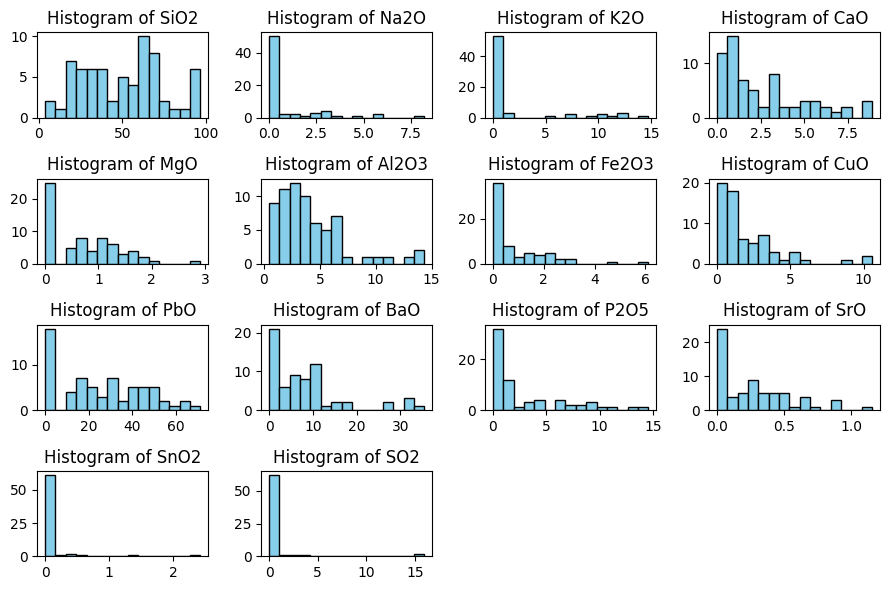

In [17]:
# Plot histograms for each numeric column
fig, axs = plt.subplots(4, 4, figsize=(9, 6)) # Creating a 4x4 grid of subplots

for i in range(16): # Loop over the 4x4 grid
    row = i // 4  # Determine the row index
    col = i % 4   # Determine the column index
    ax = axs[row, col]  # Select the corresponding subplot

    # If i is less than the number of numeric columns, plot the histogram
    if i < len(numeric_cols):
        col_name = numeric_cols[i]
        ax.hist(data[col_name].dropna(), bins=15, color='skyblue', edgecolor='black', alpha=1)
        ax.set_title(f'Histogram of {col_name}')
    else:
        # If i is greater or equal to the number of numeric columns, hide the subplot
        ax.axis('off')

plt.tight_layout()
plt.show()


In [18]:
data_raw=data.copy()

In [19]:
'''
Shapiro-Wilk测试主要用于小样本（通常小于50个观测值）。对于大样本，可能存在正态性检验的过度敏感性问题。
'''
from scipy.stats import shapiro, levene
# Initialize an empty dataframe to store the test results
test_results = pd.DataFrame()

# Loop over each numeric column
for col in numeric_cols[0:]:
    # Initialize an empty dict to store the results for this variable
    col_results = {'Variable': col}
    
    # Normality test
    # Drop NA values before performing the test
    _, p_normal = shapiro(data[col])
    col_results['Normality p-value'] = p_normal
    col_results['Normal'] = p_normal > 0.05
    
    # Variance equality test (only if the data is normal)
    if col_results['Normal']:
        _, p_equal_var = levene(data.loc[data['表面风化'] == '无风化', col].dropna(), 
                                data.loc[data['表面风化'] == '风化', col].dropna())
        col_results['Equal var p-value'] = p_equal_var
        col_results['Equal var'] = p_equal_var > 0.05
    
    # Append the results to the dataframe using pd.concat
    test_results = pd.concat([test_results, pd.DataFrame([col_results])], ignore_index=True)

# Now, the test_results dataframe contains the p-values for normality and equal variances  x
# for each numeric variable, without any transformation applied to the data.


In [20]:
test_results

,Variable,Normality p-value,Normal,Equal var p-value,Equal var
0,SiO2,5.434923e-02,True,0.009129,False
1,Na2O,5.631047e-13,False,NaN,NaN
2,K2O,2.218287e-13,False,NaN,NaN
3,CaO,8.905178e-06,False,NaN,NaN
4,MgO,1.066307e-05,False,NaN,NaN
5,Al2O3,1.085733e-06,False,NaN,NaN
6,Fe2O3,1.809425e-09,False,NaN,NaN
7,CuO,3.633815e-09,False,NaN,NaN
8,PbO,7.531955e-04,False,NaN,NaN
9,BaO,7.773099e-08,False,NaN,NaN


In [21]:
from scipy.stats.mstats import gmean

data_centralized = data.copy()

# 选择数值列
numeric_data = data_centralized.select_dtypes(include='number')

# 计算每一行的非零元素的几何均值
geo_means = []
for index, row in numeric_data.iterrows():
    non_zero_values = row[row > 0]
    geo_mean = gmean(non_zero_values) if len(non_zero_values) > 0 else 1e-6
    geo_means.append(geo_mean)

# 将每个值除以其所在行的非零元素的几何均值，并取对数
for col in numeric_data.columns:
    data_centralized[col] = np.log(numeric_data[col] / geo_means)

data_centralized.head()


D:\py1.1\envs\pytorch\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,类型,表面风化,文物采样点,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2
0,高钾,无风化,01,3.045978,-inf,1.108685,0.650820,-1.332161,0.175740,-0.639014,0.160355,-inf,-inf,-1.035896,-inf,-inf,-2.134508
1,铅钡,风化,02,2.676664,-inf,-0.865813,-0.064452,-0.749089,0.831113,-0.294026,-2.261677,2.944652,-inf,0.357963,-2.575334,-inf,-inf
2,高钾,无风化,03部位1,3.586159,-inf,0.766410,-0.182189,-inf,0.520860,-inf,-1.128785,-2.266618,-inf,-1.295839,-inf,-inf,-inf
3,高钾,无风化,03部位2,3.090699,-inf,1.483527,0.738107,-0.927387,0.673001,-0.261639,0.595531,-0.688158,0.019074,-1.388422,-3.334332,-inf,-inf
4,高钾,无风化,04,2.968764,-inf,1.049957,0.743836,-0.774386,0.643457,-0.496365,-0.439747,-inf,-inf,-1.454794,-inf,-inf,-2.240723


In [22]:
data_centralized.replace(-np.inf, 0, inplace=True)
data_centralized

,类型,表面风化,文物采样点,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2
0,高钾,无风化,01,3.045978,0.000000,1.108685,0.650820,-1.332161,0.175740,-0.639014,0.160355,0.000000,0.000000,-1.035896,0.000000,0.0,-2.134508
1,铅钡,风化,02,2.676664,0.000000,-0.865813,-0.064452,-0.749089,0.831113,-0.294026,-2.261677,2.944652,0.000000,0.357963,-2.575334,0.0,0.000000
2,高钾,无风化,03部位1,3.586159,0.000000,0.766410,-0.182189,0.000000,0.520860,0.000000,-1.128785,-2.266618,0.000000,-1.295839,0.000000,0.0,0.000000
3,高钾,无风化,03部位2,3.090699,0.000000,1.483527,0.738107,-0.927387,0.673001,-0.261639,0.595531,-0.688158,0.019074,-1.388422,-3.334332,0.0,0.000000
4,高钾,无风化,04,2.968764,0.000000,1.049957,0.743836,-0.774386,0.643457,-0.496365,-0.439747,0.000000,0.000000,-1.454794,0.000000,0.0,-2.240723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,铅钡,风化,54严重风化点,1.216607,0.000000,0.000000,0.000000,-1.518696,-0.328329,0.000000,-1.330386,2.445287,0.000000,1.025244,-1.509727,0.0,0.000000
63,铅钡,无风化,55,2.673354,-0.221722,0.000000,-1.096453,0.000000,-0.847107,0.000000,-1.369493,2.275410,0.854502,-2.268492,0.000000,0.0,0.000000
64,铅钡,风化,56,1.753603,0.000000,0.000000,-1.428231,0.000000,-1.003666,0.000000,-1.854574,2.100799,1.118757,-0.686688,0.000000,0.0,0.000000
65,铅钡,风化,57,1.386720,0.000000,0.000000,-1.578789,0.000000,-1.069491,0.000000,-1.700396,1.960066,1.001890,0.000000,0.000000,0.0,0.000000


In [23]:
data

,类型,表面风化,文物采样点,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2
0,高钾,无风化,01,71.027559,0.000000,10.234607,6.474746,0.891302,4.026227,1.782604,3.964758,0.000000,0.000000,1.198648,0.000000,0.0,0.399549
1,铅钡,风化,02,36.319952,0.000000,1.051156,2.342577,1.181299,5.736310,1.862048,0.260286,47.482230,0.000000,3.573931,0.190209,0.0,0.000000
2,高钾,无风化,03部位1,87.050000,0.000000,5.190000,2.010000,0.000000,4.060000,0.000000,0.780000,0.250000,0.000000,0.660000,0.000000,0.0,0.000000
3,高钾,无风化,03部位2,62.408981,0.000000,12.510113,5.936489,1.122573,5.562298,2.184466,5.147654,1.425971,2.892395,0.707929,0.101133,0.0,0.000000
4,高钾,无风化,04,68.582136,0.000000,10.066625,7.412034,1.623985,6.704143,2.144493,2.269415,0.000000,0.000000,0.822403,0.000000,0.0,0.374766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,铅钡,风化,54严重风化点,17.653735,0.000000,0.000000,0.000000,1.145274,3.765993,0.000000,1.382584,60.317788,0.000000,14.579034,1.155592,0.0,0.000000
63,铅钡,无风化,55,50.850799,2.811787,0.000000,1.172442,0.000000,1.504462,0.000000,0.892301,34.156464,8.248599,0.363146,0.000000,0.0,0.000000
64,铅钡,风化,56,31.602342,0.000000,0.000000,1.311795,0.000000,2.005637,0.000000,0.856461,44.720295,16.749783,2.753686,0.000000,0.0,0.000000
65,铅钡,风化,57,27.489997,0.000000,0.000000,1.416676,0.000000,2.357521,0.000000,1.254461,48.772575,18.708770,0.000000,0.000000,0.0,0.000000


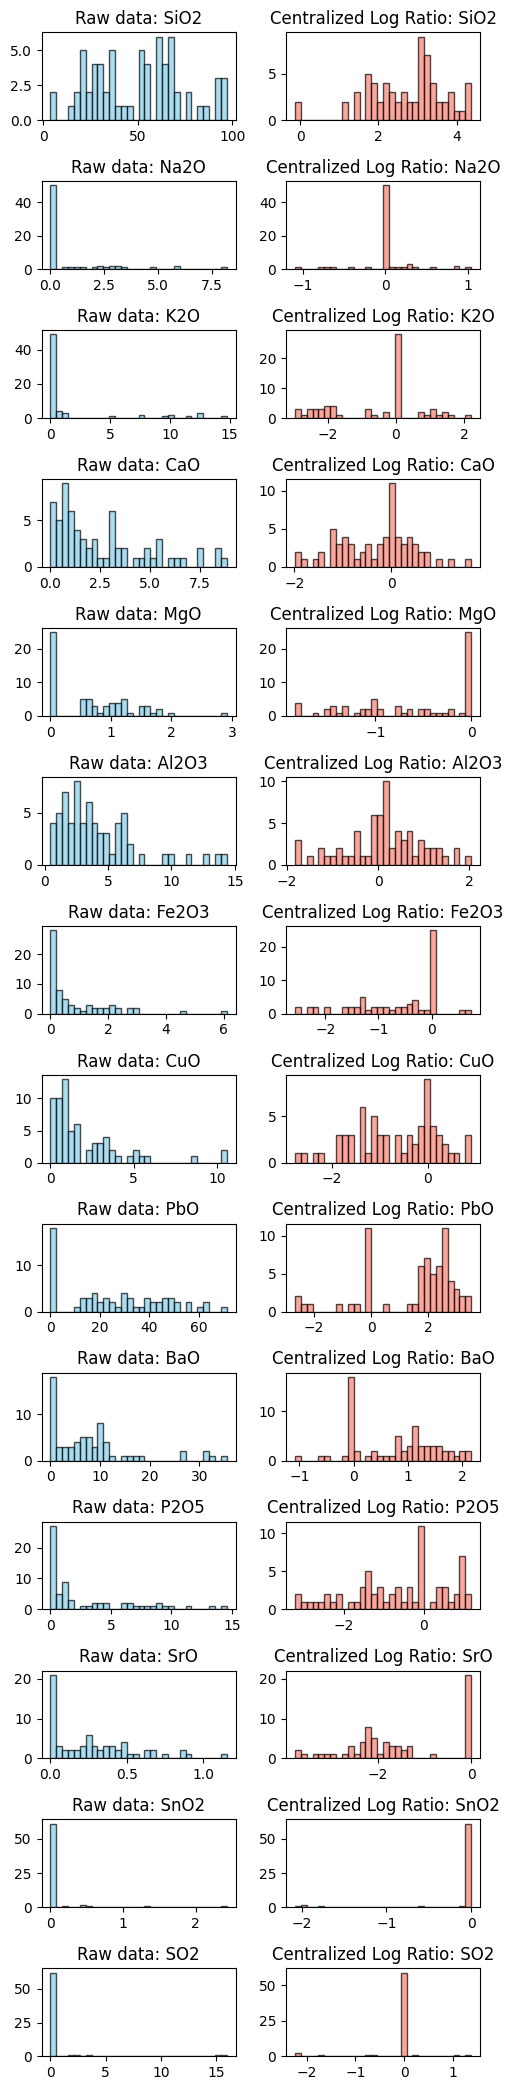

In [24]:
selected_cols=new_component_cols
plt.rcParams['font.family'] = 'DejaVu Sans'
fig, axs = plt.subplots(len(selected_cols), 2, figsize=(5, len(selected_cols)*1.5))

for i, col in enumerate(selected_cols):
    # Plot raw data
    axs[i, 0].hist(data_raw[col].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7) 
    axs[i, 0].set_title(f'Raw data: {col}')
    
    # Plot centralized log ratio transformed data
    axs[i, 1].hist(data_centralized[col].dropna(), bins=30, color='salmon', edgecolor='black', alpha=0.7)
    axs[i, 1].set_title(f'Centralized Log Ratio: {col}')

plt.tight_layout()
plt.show()

In [25]:
data=data_centralized.copy()
# Count the unique values in the '类型' and '表面风化' columns
glass_types = data['类型'].unique()
weathering_states = data['表面风化'].unique()

glass_types, weathering_states


(array(['高钾', '铅钡'], dtype=object), array(['无风化', '风化'], dtype=object))

In [26]:
# Initialize an empty DataFrame to store the results
grouped_stats = pd.DataFrame()


component_cols = ['SiO2', 'Na2O', 'K2O', 'CaO', 'MgO', 
                      'Al2O3', 'Fe2O3', 'CuO', 'PbO', 'BaO', 
                      'P2O5', 'SrO', 'SnO2', 'SO2']
for component in component_cols:
    component_data = data.groupby(['类型', '表面风化'])[component]
    stats = component_data.agg(['mean', 'max', 'min', 'std', 'var', 'skew'])
    stats['kurt'] = component_data.apply(pd.DataFrame.kurt)
    stats['cv'] = stats['std'] / stats['mean']  # calculate coefficient of variation
    # Add a level to column names
    stats.columns = pd.MultiIndex.from_product([[component], stats.columns])
    
    grouped_stats = pd.concat([grouped_stats, stats], axis=1)

grouped_stats

SiO2                                                              \
             mean       max       min       std       var      skew      kurt   
类型 表面风化                                                                         
铅钡 无风化   3.013743  3.871521  1.859524  0.646195  0.417567 -0.301305 -0.956815   
   风化    2.242329  3.937307 -0.131353  0.923780  0.853370 -0.584811  0.650707   
高钾 无风化   3.165687  3.712288  2.266609  0.363205  0.131918 -1.093726  3.036563   
   风化    4.187045  4.372977  3.830498  0.187388  0.035114 -1.731995  3.641136   

                       Na2O            ...       SnO2                 SO2  \
               cv      mean       max  ...       kurt        cv      mean   
类型 表面风化                                ...                                  
铅钡 无风化   0.214416  0.071131  0.876318  ...   3.253187 -2.441987  0.020569   
   风化    0.411973  0.013371  1.043858  ...  13.632917 -3.664983  0.028021   
高钾 无风化   0.114732 -0.013585  0.320182  ...  12.000000 -3.464102 -0.507620   
   风化    0.044754  0.000000  0.000000  ...   0.000000       NaN  0.000000   

                                                                      \
              max       min       std       var      skew       kurt   
类型 表面风化                                                                
铅钡 无风化   0.267396  0.000000  0.074162  0.005500  3.605551  13.000000   
   风化    1.369229 -0.796562  0.336451  0.113199  2.108909   9.857280   
高钾 无风化   0.000000 -2.240723  0.925901  0.857292 -1.388056  -0.011455   
   风化    0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   

                    
                cv  
类型 表面风化             
铅钡 无风化    3.605551  
   风化    12.007019  
高钾 无风化   -1.824002  
   风化          NaN  

[4 rows x 112 columns]

In [27]:
grouped_stats['SiO2', 'mean']

类型  表面风化
铅钡  无风化     3.013743
    风化      2.242329
高钾  无风化     3.165687
    风化      4.187045
Name: (SiO2, mean), dtype: float64

In [28]:
# Adjusting the code to avoid renaming columns, instead we will capture the group information in the DataFrame index
tables_dict = {}

for glass_type in glass_types:
    for weathering_state in weathering_states:
        subset = grouped_stats.loc[glass_type, weathering_state].unstack().T
        table_name = f"{glass_type}_{weathering_state}"
        tables_dict[table_name] = pd.DataFrame(subset)  # 显式地转换为pd.DataFrame
        
# Looping through the tables_dict and outputting each DataFrame

tables_dict


{'高钾_无风化':          Al2O3       BaO       CaO       CuO     Fe2O3       K2O       MgO  \
 cv    0.664393 -1.972230  0.893838 -2.321136 -1.626433  0.473990 -0.700958   
 kurt -1.409964  3.016385 -0.156702  1.577446  0.472540  1.635379 -1.292382   
 max   1.508084  0.019074  1.647769  0.595531  0.747950  2.210662  0.000000   
 mean  0.776104 -0.179823  0.599071 -0.262942 -0.390464  1.145963 -0.674968   
 min   0.006978 -1.080913 -0.182189 -1.652716 -1.590841  0.000000 -1.332161   
 skew -0.031480 -1.906416  0.378894 -1.180633 -0.394538 -0.184857  0.061519   
 std   0.515638  0.354653  0.535473  0.610324  0.635064  0.543175  0.473124   
 var   0.265882  0.125778  0.286731  0.372495  0.403306  0.295039  0.223846   
 
            Na2O      P2O5       PbO       SO2      SiO2       SnO2       SrO  
 cv   -19.285768 -0.979906 -1.116780 -1.824002  0.114732  -3.464102 -1.050200  
 kurt   7.015733  0.317255 -1.629147 -0.011455  3.036563  12.000000 -2.376521  
 max    0.320182  0.526955  0.000000 

In [29]:
tables_dict['高钾_无风化']

,Al2O3,BaO,CaO,CuO,Fe2O3,K2O,MgO,Na2O,P2O5,PbO,SO2,SiO2,SnO2,SrO
cv,0.664393,-1.972230,0.893838,-2.321136,-1.626433,0.473990,-0.700958,-19.285768,-0.979906,-1.116780,-1.824002,0.114732,-3.464102,-1.050200
kurt,-1.409964,3.016385,-0.156702,1.577446,0.472540,1.635379,-1.292382,7.015733,0.317255,-1.629147,-0.011455,3.036563,12.000000,-2.376521
max,1.508084,0.019074,1.647769,0.595531,0.747950,2.210662,0.000000,0.320182,0.526955,0.000000,0.000000,3.712288,0.000000,0.000000
mean,0.776104,-0.179823,0.599071,-0.262942,-0.390464,1.145963,-0.674968,-0.013585,-0.938500,-0.987338,-0.507620,3.165687,-0.007795,-1.723790
min,0.006978,-1.080913,-0.182189,-1.652716,-1.590841,0.000000,-1.332161,-0.760277,-2.730275,-2.672140,-2.240723,2.266609,-0.093536,-3.774602
skew,-0.031480,-1.906416,0.378894,-1.180633,-0.394538,-0.184857,0.061519,-2.150622,0.057567,-0.552251,-1.388056,-1.093726,-3.464102,-0.037176
std,0.515638,0.354653,0.535473,0.610324,0.635064,0.543175,0.473124,0.262001,0.919641,1.102639,0.925901,0.363205,0.027002,1.810324
var,0.265882,0.125778,0.286731,0.372495,0.403306,0.295039,0.223846,0.068645,0.845740,1.215812,0.857292,0.131918,0.000729,3.277274


In [30]:
data

,类型,表面风化,文物采样点,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2
0,高钾,无风化,01,3.045978,0.000000,1.108685,0.650820,-1.332161,0.175740,-0.639014,0.160355,0.000000,0.000000,-1.035896,0.000000,0.0,-2.134508
1,铅钡,风化,02,2.676664,0.000000,-0.865813,-0.064452,-0.749089,0.831113,-0.294026,-2.261677,2.944652,0.000000,0.357963,-2.575334,0.0,0.000000
2,高钾,无风化,03部位1,3.586159,0.000000,0.766410,-0.182189,0.000000,0.520860,0.000000,-1.128785,-2.266618,0.000000,-1.295839,0.000000,0.0,0.000000
3,高钾,无风化,03部位2,3.090699,0.000000,1.483527,0.738107,-0.927387,0.673001,-0.261639,0.595531,-0.688158,0.019074,-1.388422,-3.334332,0.0,0.000000
4,高钾,无风化,04,2.968764,0.000000,1.049957,0.743836,-0.774386,0.643457,-0.496365,-0.439747,0.000000,0.000000,-1.454794,0.000000,0.0,-2.240723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,铅钡,风化,54严重风化点,1.216607,0.000000,0.000000,0.000000,-1.518696,-0.328329,0.000000,-1.330386,2.445287,0.000000,1.025244,-1.509727,0.0,0.000000
63,铅钡,无风化,55,2.673354,-0.221722,0.000000,-1.096453,0.000000,-0.847107,0.000000,-1.369493,2.275410,0.854502,-2.268492,0.000000,0.0,0.000000
64,铅钡,风化,56,1.753603,0.000000,0.000000,-1.428231,0.000000,-1.003666,0.000000,-1.854574,2.100799,1.118757,-0.686688,0.000000,0.0,0.000000
65,铅钡,风化,57,1.386720,0.000000,0.000000,-1.578789,0.000000,-1.069491,0.000000,-1.700396,1.960066,1.001890,0.000000,0.000000,0.0,0.000000


In [32]:
import matplotlib.pyplot as plt  # or another font that supports the special character
import seaborn as sns
plt.rcParams['font.family'] = 'DejaVu Sans'
# Correct the condition for each DataFrame
data_high_potassium_erosion = data[(data['类型'] == '高钾') & (data['表面风化'] == '风化')]
data_high_potassium_no_erosion = data[(data['类型'] == '高钾') & (data['表面风化'] == '无风化')]
data_lead_barium_erosion = data[(data['类型'] == '铅钡') & (data['表面风化'] == '风化')]
data_lead_barium_no_erosion = data[(data['类型'] == '铅钡') & (data['表面风化'] == '无风化')]
data_high_potassium_erosion

,类型,表面风化,文物采样点,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2
8,高钾,风化,07,3.830498,0.0,0.000000,-0.630456,0.000000,-0.015018,-2.470072,0.477459,0.0,0.0,-1.192411,0.0,0.0,0.0
11,高钾,风化,09,4.257652,0.0,-0.824068,-0.774471,0.000000,-0.018804,-1.435870,0.141819,0.0,0.0,-1.346258,0.0,0.0,0.0
12,高钾,风化,10,4.372977,0.0,-0.282742,-1.760008,0.000000,-0.410081,-1.546434,-0.373713,0.0,0.0,0.000000,0.0,0.0,0.0
14,高钾,风化,12,4.264655,0.0,-0.271769,-0.610224,0.000000,0.096717,-1.519594,0.219055,0.0,0.0,-2.178840,0.0,0.0,0.0
22,高钾,风化,22,4.234402,0.0,-0.592288,0.215634,-0.737471,0.961580,-1.341006,-0.889020,0.0,0.0,-1.851831,0.0,0.0,0.0
28,高钾,风化,27,4.162084,0.0,0.000000,-0.429375,-0.983686,0.552783,-1.976938,0.064283,0.0,0.0,-1.389151,0.0,0.0,0.0


In [33]:
# Create a new DataFrame for boxplot
boxplot_data_high_potassium_erosion = data_high_potassium_erosion.melt(id_vars=['类型', '表面风化'], value_vars=component_cols)
boxplot_data_high_potassium_no_erosion = data_high_potassium_no_erosion.melt(id_vars=['类型', '表面风化'], value_vars=component_cols)
boxplot_data_lead_barium_erosion = data_lead_barium_erosion.melt(id_vars=['类型', '表面风化'], value_vars=component_cols)
boxplot_data_lead_barium_no_erosion = data_lead_barium_no_erosion.melt(id_vars=['类型', '表面风化'], value_vars=component_cols)
boxplot_data_high_potassium_erosion

,类型,表面风化,variable,value
0,高钾,风化,SiO2,3.830498
1,高钾,风化,SiO2,4.257652
2,高钾,风化,SiO2,4.372977
3,高钾,风化,SiO2,4.264655
4,高钾,风化,SiO2,4.234402
...,...,...,...,...
79,高钾,风化,SO2,0.000000
80,高钾,风化,SO2,0.000000
81,高钾,风化,SO2,0.000000
82,高钾,风化,SO2,0.000000


<Figure size 1200x800 with 0 Axes>

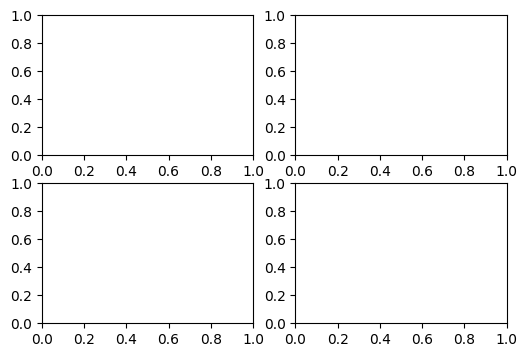

In [79]:
plt.figure(figsize=(12, 8))

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(6, 4))

In [80]:
axs.flatten()

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
      dtype=object)

<Figure size 4000x4000 with 0 Axes>

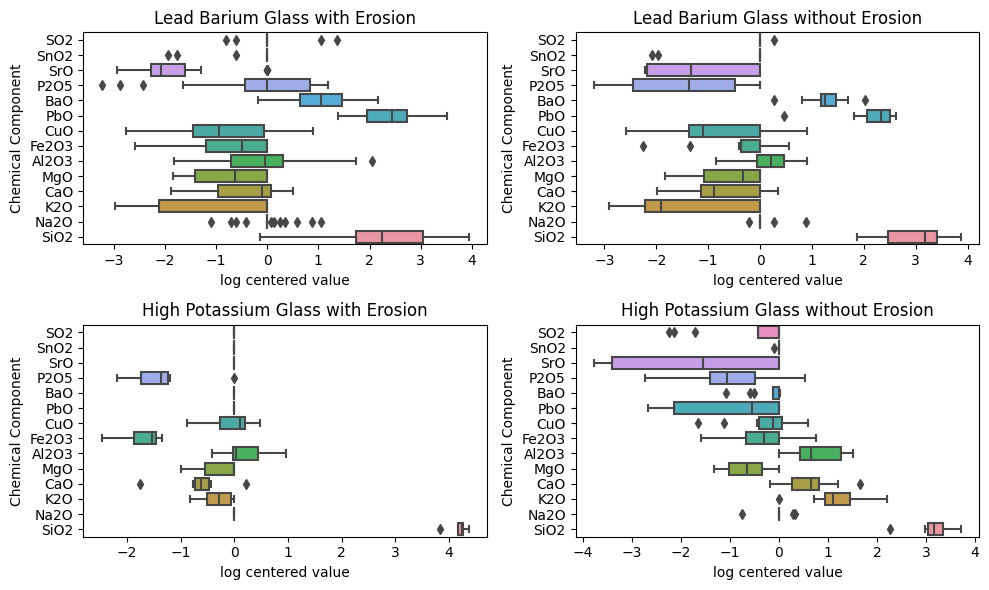

In [89]:
plt.figure(figsize=(40, 40))

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
# orient="h" 是 seaborn 的 boxplot 方法中的一个参数。当设置为 "h" 时，它会使箱线图水平绘制。
# Reorder the data and titles to switch the positions of the plots
data_list = [boxplot_data_lead_barium_erosion, boxplot_data_lead_barium_no_erosion, boxplot_data_high_potassium_erosion, boxplot_data_high_potassium_no_erosion]
titles = ['Lead Barium Glass with Erosion', 'Lead Barium Glass without Erosion', 'High Potassium Glass with Erosion', 'High Potassium Glass without Erosion']

# Generate boxplots for each condition
for ax, data, title in zip(axs.flatten(), data_list, titles):
    sns.boxplot(y='variable', x='value', data=data, ax=ax, orient="h")
    ax.set_ylabel('Chemical Component')
    ax.set_xlabel('log centered value')
    ax.set_title('{}'.format(title))
    ax.invert_yaxis() # Invert the y-axis labels

# Adjust layout
plt.tight_layout()
plt.show()
